  
   
   
   
  <br>
  <br>
  <br>
  <br>
   
   
   
   
<h1 style="text-align: center; font-weight: bold;">"Predictive Modeling for Optimizing Direct Marketing Campaigns:
    A Machine Learning Approach to Enhancing Client Subscription Rates in Banking"</h1><br>
   
   
   
   <br>
   <br>
   <br>
   <br>
   
   
   
<h1 style="text-align: center; font-weight: bold;">"Metro College of Technology "</h1><br>



<img src="https://www.gsblsu.org/wp-content/uploads/2021/11/bank-marketing-scaled.jpeg" width="900">

<br>
<br>
<br>
<br>
<br>
<br>
<br>





<h1 style="text-align: right; font-weight: bold; font-size: 20px"> Author: Mentesnot Alemu</h1>

<br>
<br>

<h1 style="text-align: right; font-weight: bold; font-size: 20px"> Submission Date: Auguest 28, 2024</h1>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>


### Introduction
In today's highly competitive financial sector, banks are continually seeking ways to enhance their marketing strategies and improve client engagement. One effective method employed by a Portuguese banking institution was direct marketing through phone call campaigns, aimed at encouraging clients to subscribe to term deposits. These campaigns often involved multiple interactions with the same client to determine their interest in the product. Given the substantial resources required for such campaigns, optimizing the approach to increase conversion rates became a critical focus for the bank.

This project was initiated to develop predictive models that can accurately forecast whether a client will subscribe to a term deposit, based on various client attributes and campaign-related features. The dataset used for this analysis comprises detailed records of client demographics, previous interactions, economic indicators, and contact history, offering a comprehensive view of the factors that influence a client’s decision.

To achieve this, we employed a range of machine learning models, including Logistic Regression, Decision Trees, Random Forests, Support Vector Machines, and Gradient Boosting. The analysis was conducted using Azure Notebook, Azure AutoML, and Azure Machine Learning Designer, which provided a scalable and efficient environment for data processing, feature engineering, and model optimization. These tools ensured that the models were robust and adaptable to the bank’s specific requirements.

A key challenge addressed in this project was the class imbalance in the dataset, where the number of clients who subscribed to a term deposit was significantly lower than those who did not. This imbalance affected the models' ability to accurately predict the minority class. Additionally, feature engineering played a crucial role in enhancing model performance by extracting meaningful patterns from the data.

Ultimately, the goal of this project is to provide the bank with a data-driven tool to optimize its marketing efforts, focusing resources on clients most likely to subscribe, thereby increasing the effectiveness and efficiency of future campaigns. The insights gained will support the bank in refining its marketing strategies, reducing costs, and improving conversion rates.

### Executive Summary
This project analyzed direct marketing campaigns conducted by a Portuguese banking institution to predict client subscription to term deposits based on phone call interactions. The dataset included client demographics, contact history, and campaign responses. Several machine learning models—Logistic Regression, Decision Trees, Random Forests, Support Vector Machines, and Gradient Boosting—were evaluated to identify the most effective predictive approach.

The Gradient Boosting Classifier emerged as the top-performing model, achieving a cross-validation accuracy of 0.9171 and a test accuracy of 0.9151. It excelled in balancing precision and recall, making it the best choice for predicting term deposit subscriptions. Although other models such as Logistic Regression and Random Forests also performed well, Gradient Boosting consistently delivered superior results in handling the dataset’s complexities.

The analysis highlighted a significant challenge with class imbalance, where the number of subscribing clients was much lower than non-subscribing clients. This imbalance affected model performance, particularly in predicting the minority class. To address this, recommendations include employing techniques such as Synthetic Minority Over-sampling Technique (SMOTE) and adjusting class weights to improve recall for the minority class.

The analysis was conducted using Azure Notebook, Azure AutoML, and Azure Machine Learning Designer. These platforms facilitated efficient model development and evaluation, providing a robust environment for handling complex data and optimizing predictive models.

In conclusion, by adopting the Gradient Boosting Classifier and addressing class imbalance, the bank can enhance its marketing strategy, focusing efforts on clients with higher subscription probabilities. This will lead to more efficient resource allocation, reduced marketing costs, and increased conversion rates. The insights from this project provide actionable guidance for refining marketing campaigns and achieving better business outcomes.

### Problem Statement:

The bank's direct marketing campaigns, which involve multiple phone contacts to clients, have resulted in low subscription rates for term deposits. The challenge lies in accurately predicting which clients are likely to subscribe, allowing the bank to optimize its resources and improve the effectiveness of future campaigns. 

This project aims to develop a predictive model that can identify potential subscribers with high accuracy, thereby enhancing the bank's marketing strategies and increasing term deposit subscriptions.

### Data Processing 

In [198]:
import pandas as pd 
import numpy as np
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from scipy.stats import chi2_contingency, ttest_ind, f_oneway
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, mean_squared_error

In [379]:
df= pd.read_csv('bank-modified-full.csv')
df = df.drop(columns=['age_c'])

In [170]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             40365 non-null  float64
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [110]:
df.shape

(41188, 22)

In [112]:
df['job'].value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

### Handling Missing Values

#### Check for Missing Values: Identify missing data in each column.

In [216]:
df.isnull().sum()

age               823
job                 0
marital             0
education           0
default             0
housing             0
loan                0
contact             0
month               0
day_of_week         0
duration            0
campaign            0
pdays               0
previous            0
poutcome            0
emp.var.rate        0
cons.price.idx      0
cons.conf.idx       0
euribor3m           0
nr.employed         0
y                   0
dtype: int64

so we do have 823 missing data from ageImpute or Remove Missing Data:

### Impute

In [383]:
df['age'].fillna(df['age'].mean(), inplace=True) 

In [220]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### 1.2 Duplicates

#### Remove Duplicates: Ensure there are no duplicate rows.

In [222]:
df.duplicated().sum()

12

In [385]:
df.drop_duplicates(inplace=True)

In [124]:
df.duplicated().sum()

0

In [126]:
df.dtypes

age               float64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
age_c             float64
dtype: object

###  Feature engineering
#### Creating New Features




#### Interaction Terms:  create an interaction between pdays and campaign:

In [387]:

df['pdays_campaign_interaction'] = df['pdays'] * df['campaign']


#### Age Grouping:  group the age column into bins to create age categories:

In [389]:

df['age_group'] = pd.cut(df['age'], bins=[0, 30, 50, 70, 100], labels=['Young', 'Middle-aged', 'Senior', 'Elderly'])


#### Length of Relationship:  create a new feature based on the duration column to represent the length of the relationship with the client:




In [391]:
df['short_long_duration'] = df['duration'].apply(lambda x: 'Short' if x < 300 else 'Long')

In [232]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays_campaign_interaction,age_group,short_long_duration
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,999,Senior,Short
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,999,Senior,Short
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,999,Middle-aged,Short
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,999,Middle-aged,Short
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,999,Senior,Long


 #### Encoding Categorical Variables

In [136]:
df = pd.get_dummies(df)

## Exploratory Data Analysis (EDA)

In [234]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays_campaign_interaction
count,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.032593,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870,0.112663,2498.736181
std,10.316650,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364,0.316184,2796.062843
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000,999.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000,1998.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000,2997.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000,55944.000000


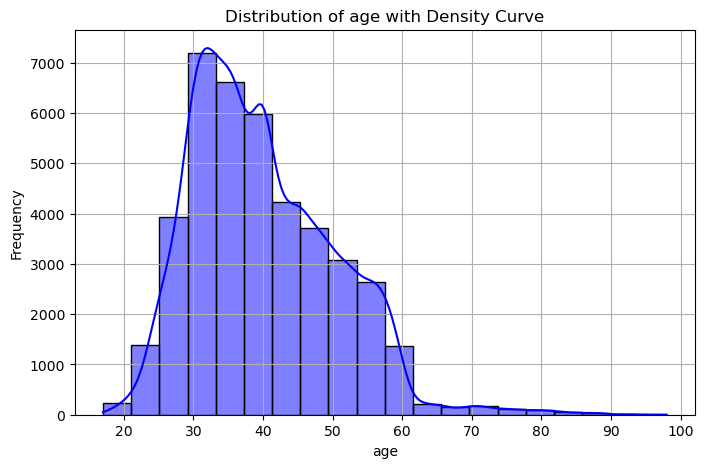

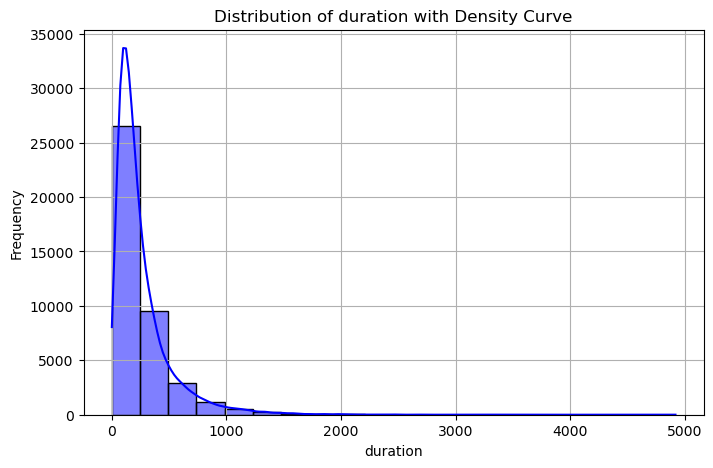

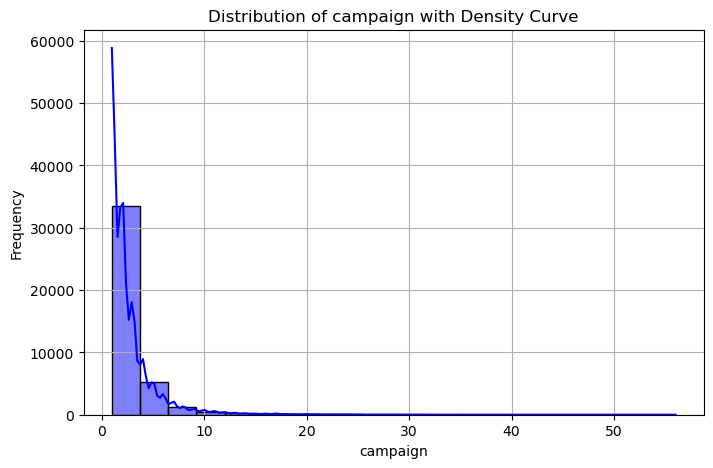

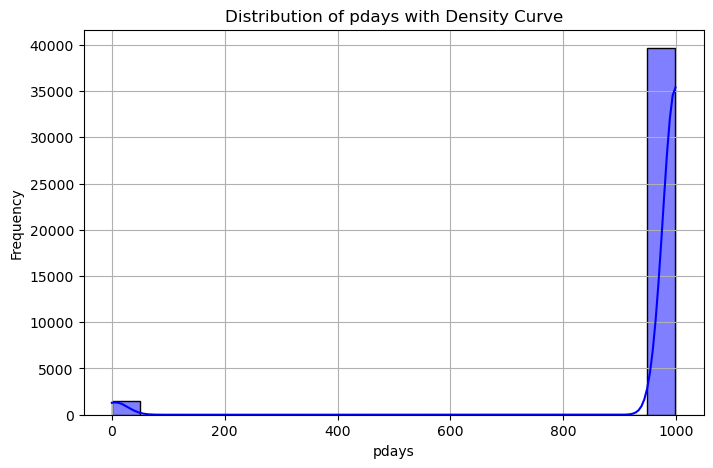

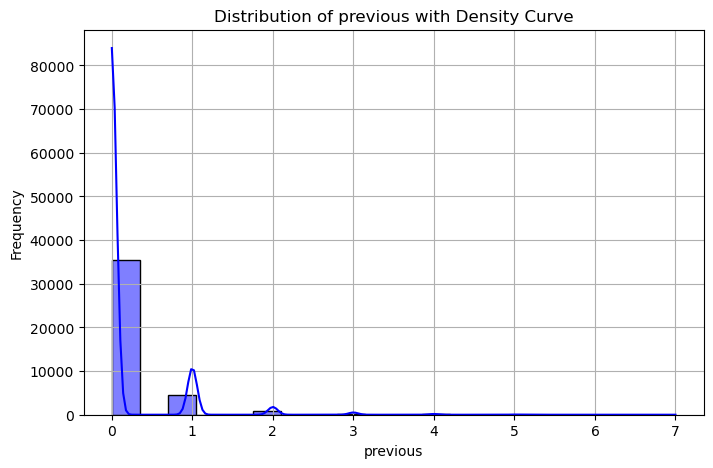

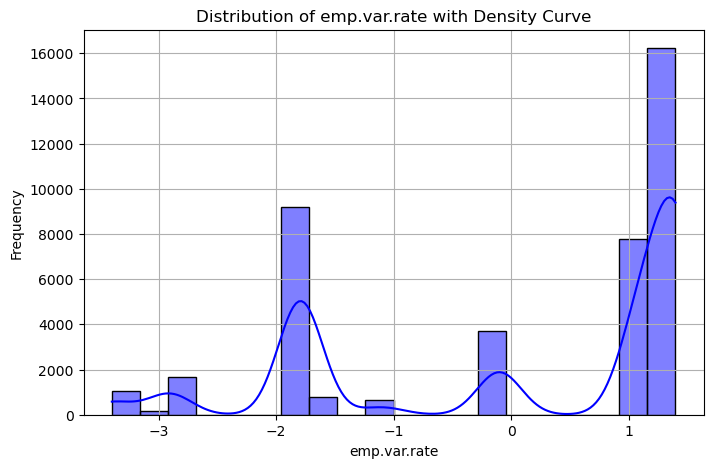

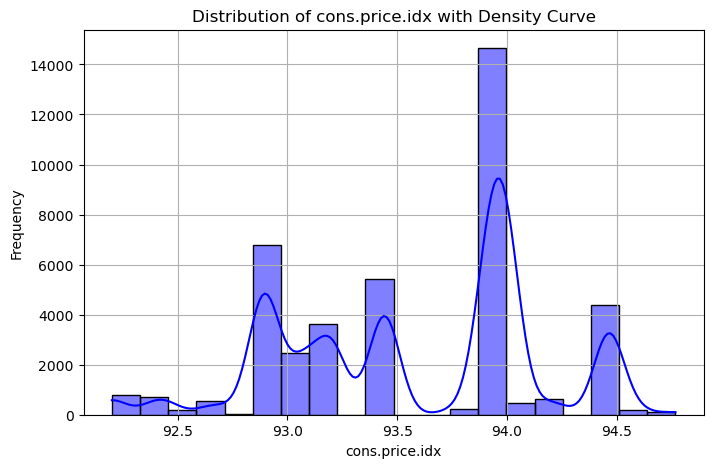

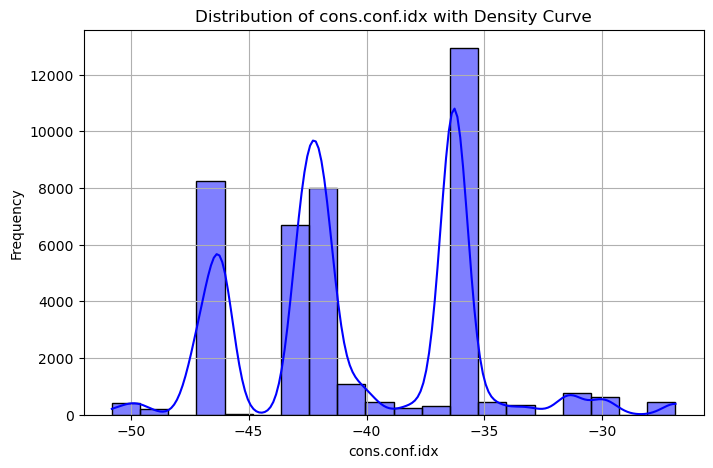

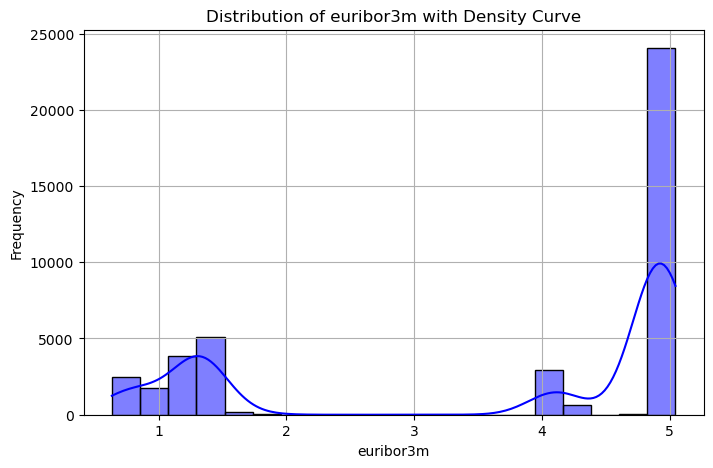

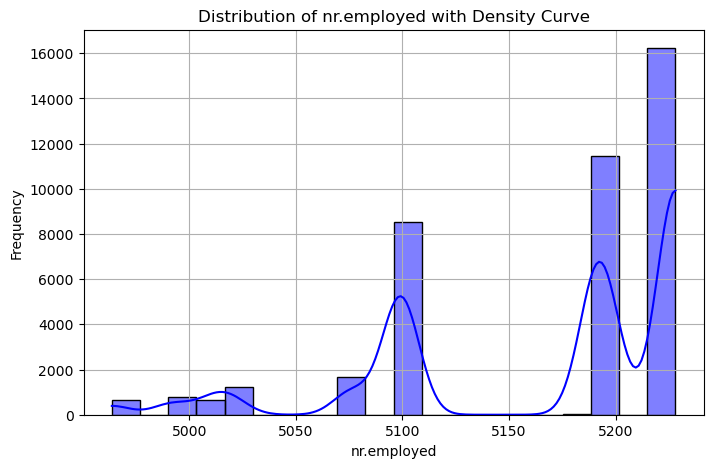

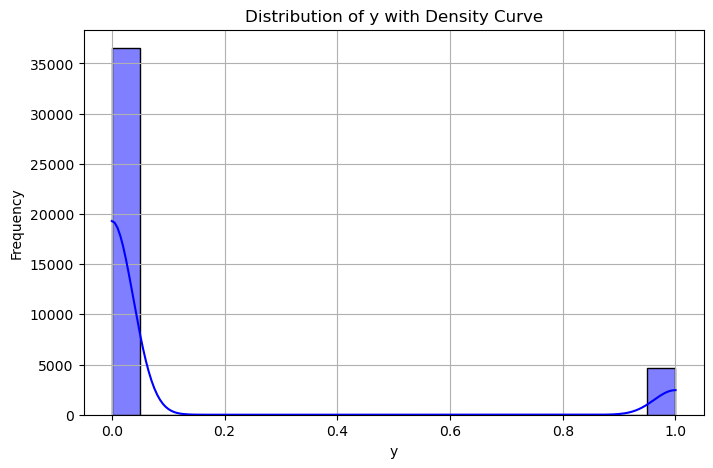

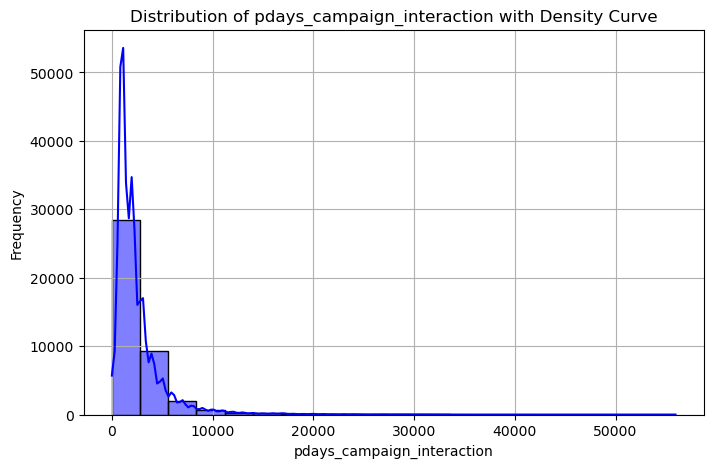

In [236]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms with density curves for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[column], bins=20, kde=True, color='blue', edgecolor='black')
    plt.title(f'Distribution of {column} with Density Curve')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

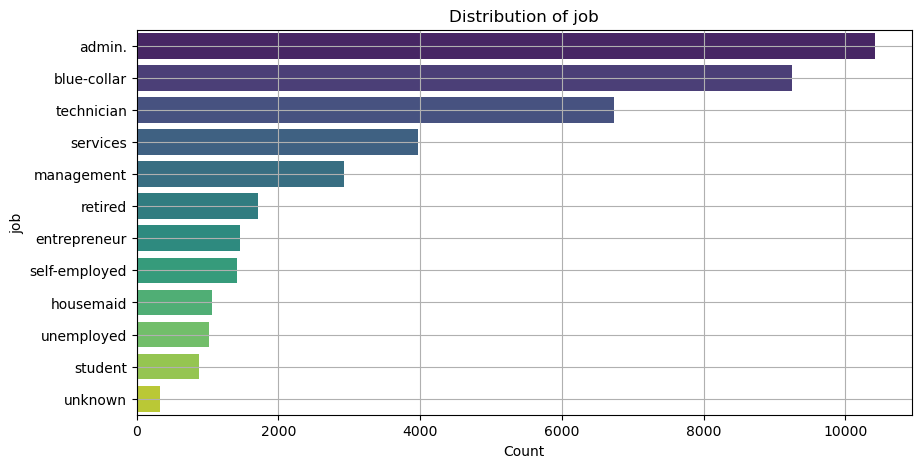

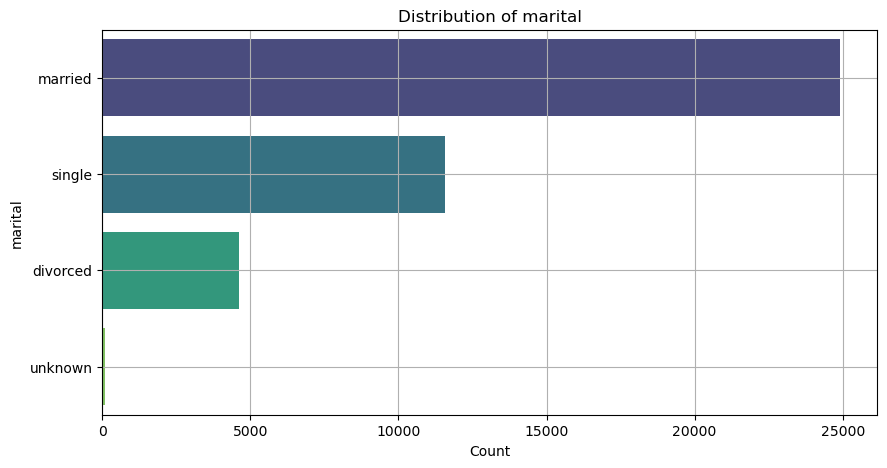

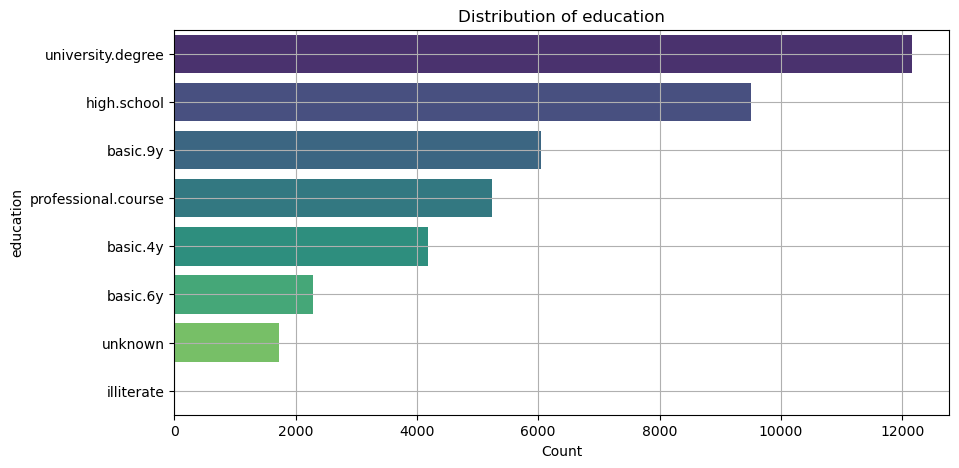

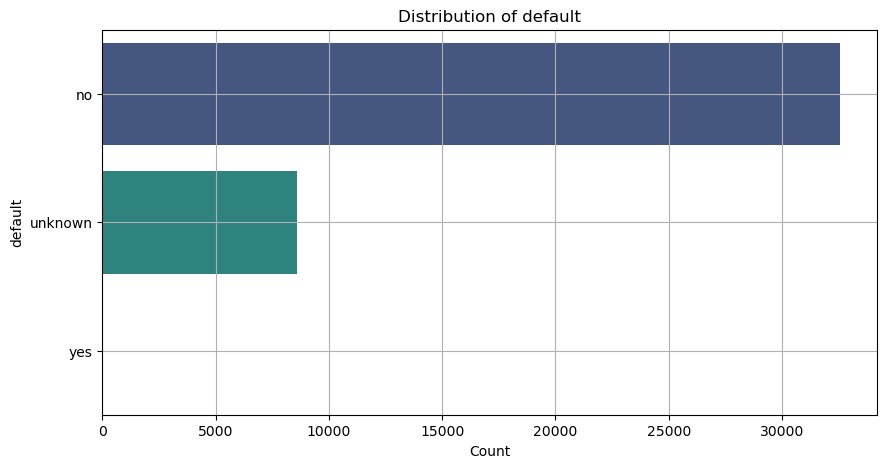

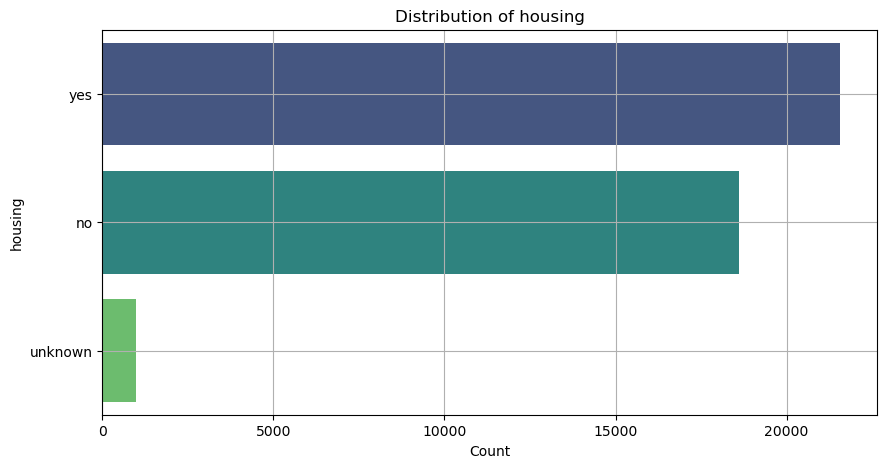

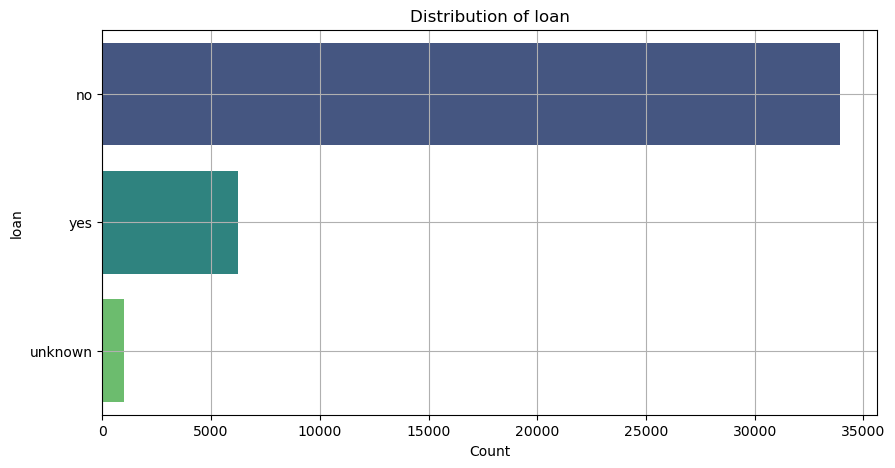

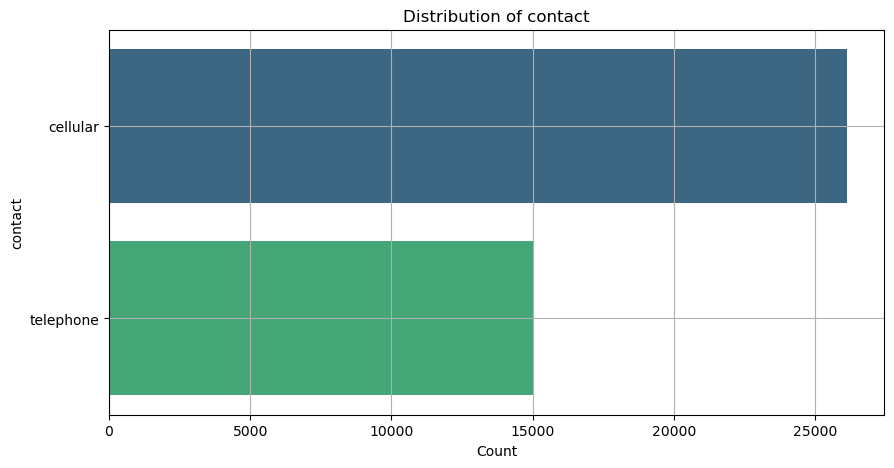

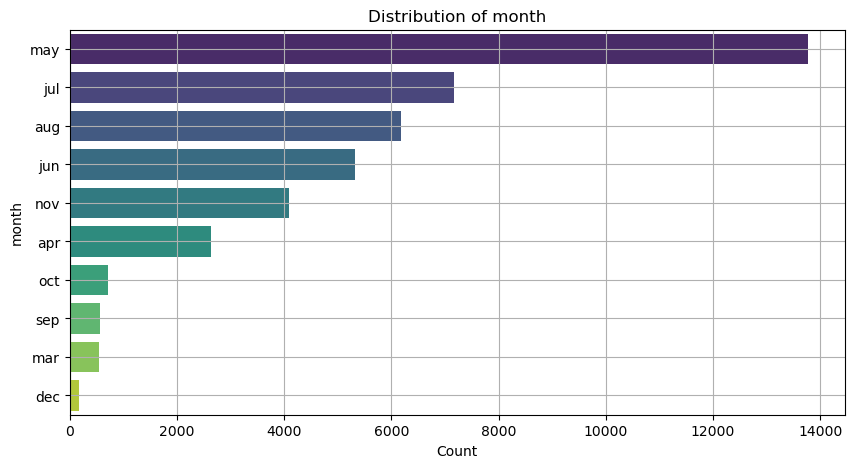

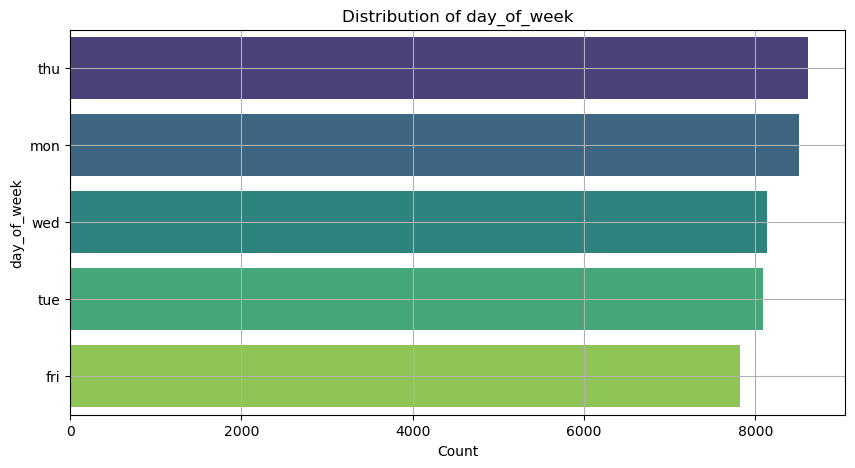

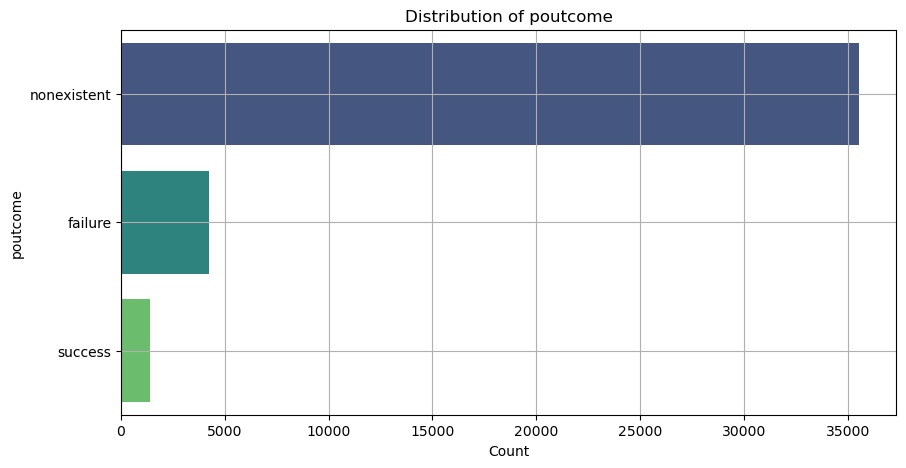

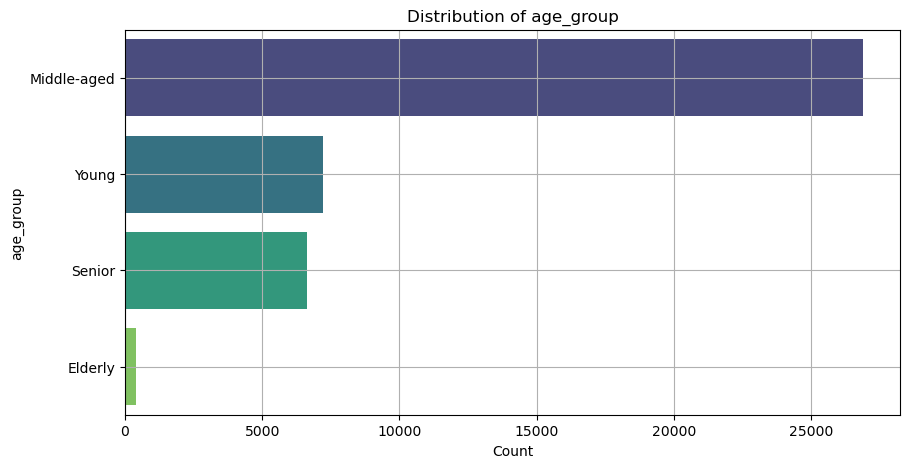

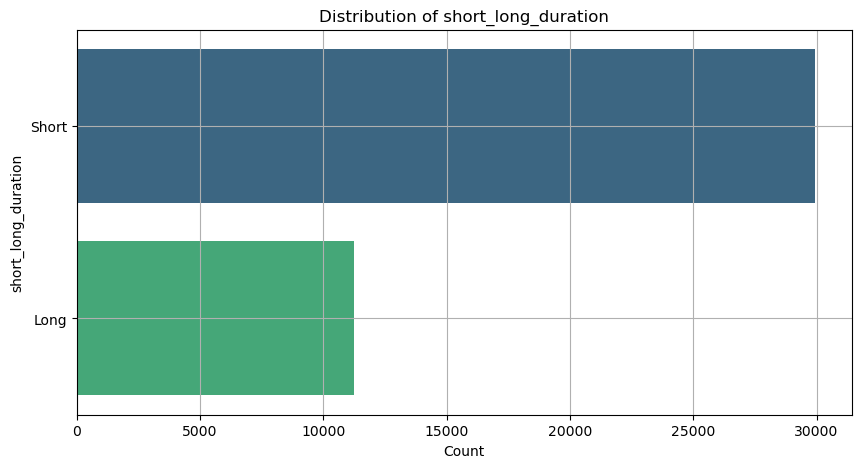

In [237]:
# Select only categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Plot bar plots for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=df[column], order=df[column].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)
    plt.grid(True)
    plt.show()

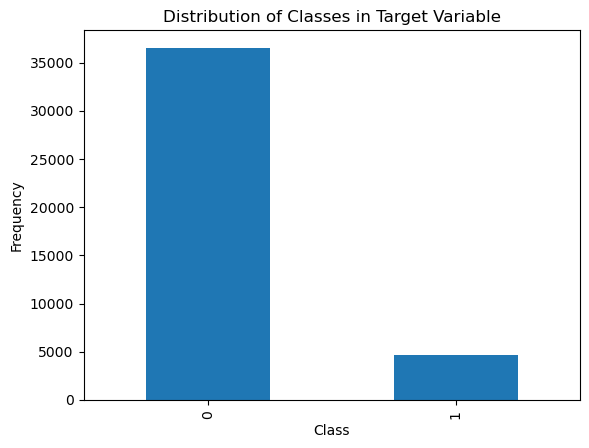

In [381]:
df['y'].value_counts().plot(kind='bar')
plt.title('Distribution of Classes in Target Variable')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

#### Correlation Matrix: Check for relationships between numeric features

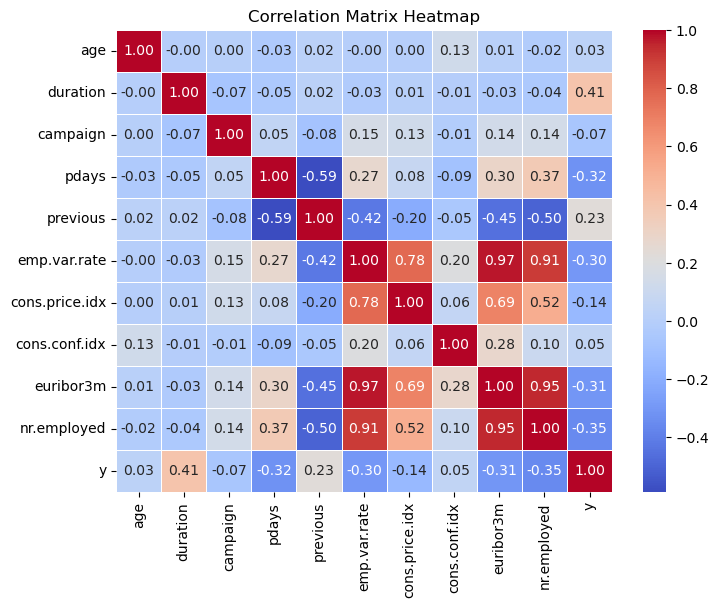

In [173]:
# Compute the correlation matrix for numeric columns
corr_matrix = df[numeric_columns].corr()

# Create a heatmap of the correlation matrix with 2 decimal places
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [178]:
def remove_collinear_features(numeric_columns, threshold):
    drop_cols = []
    pairs = pd.DataFrame(columns=['feature1', 'feature2', 'value'])
    cm = numeric_columns.corr().abs()  # correlation matrix
    np.fill_diagonal(cm.values, 0)  # set diagonal to 0 
    corr = [(cm.index[x], cm.columns[y], cm.iloc[x, y]) for x, y in zip(*np.where(abs(np.tril(cm)) > threshold))]  # create couple (feature1, feature2, value)
    for couple in corr:
        feature1, feature2, value = couple
        entry = {'feature1': [feature1], 'feature2': [feature2], 'value': [value]}
        temp = pd.DataFrame(entry)
        pairs = pd.concat([pairs, temp], ignore_index=True)
        drop_cols.append(feature1)

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    df = df.drop(columns=drops)
    # Optionally print pairs of highly correlated features
    print(pairs)
    return df
    # Assuming your dataframe is named 'data'
# Separate predictors (features) and target variable
X = numeric_columns.iloc[:, :-1]  # All columns except the last one
y = numeric_columns.iloc[:, -1]   # Last column (target)

# Remove collinear features from predictors only
X_reduced = remove_collinear_features(X, 0.6)

# Combine the reduced predictors with the target variable
data_reduced = pd.concat([X_reduced, y], axis=1)

# Display the reduced dataframe
print(data_reduced.head())

AttributeError: 'Index' object has no attribute 'iloc'

In [240]:

#Define a function to detect outliers using the Tukey method
def detect_outliers_tukey(df, cols):
    outliers = {}
    
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_fence = Q1 - 3 * IQR
        upper_fence = Q3 + 3 * IQR

        outliers[col] = df[(df[col] < lower_fence) | (df[col] > upper_fence)]

        print(f"Outliers in {col}:")
        print(outliers[col])
          
    return outliers

# usage with numerical columns


# Detect outliers
outliers = detect_outliers_tukey(df, numeric_columns)
def remove_outliers(df, outliers_dict):
    for col, outliers in outliers_dict.items():
        df = df[~df.index.isin(outliers.index)]
    return df

# Remove the outliers
df_cleaned = remove_outliers(df, outliers)

Outliers in age:
        age      job   marital education  default housing loan   contact  \
27826  95.0  retired  divorced  basic.6y       no      no   no  cellular   
38452  98.0  retired   married  basic.4y  unknown     yes   no  cellular   
38455  98.0  retired   married  basic.4y  unknown     yes   no  cellular   
38921  94.0  retired   married  basic.9y       no      no   no  cellular   

      month day_of_week  ...     poutcome  emp.var.rate  cons.price.idx  \
27826   mar         thu  ...  nonexistent          -1.8          92.843   
38452   oct         fri  ...      success          -3.4          92.431   
38455   oct         fri  ...  nonexistent          -3.4          92.431   
38921   nov         wed  ...      failure          -3.4          92.649   

       cons.conf.idx euribor3m  nr.employed  y  pdays_campaign_interaction  \
27826          -50.0     1.650       5099.1  0                         999   
38452          -26.9     0.730       5017.5  1                        

In [184]:
df_cleaned.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


### One_hot encoding 

In [393]:
df = pd.get_dummies(df)
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,age_group_Young,age_group_Middle-aged,age_group_Senior,age_group_Elderly,short_long_duration_Long,short_long_duration_Short
0,56.0,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,True,False,False,False,True,False,False,True
1,57.0,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,True,False,False,False,True,False,False,True
2,37.0,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,True,False,False,True,False,False,False,True
3,40.0,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,True,False,False,True,False,False,False,True
4,56.0,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,True,False,False,False,True,False,True,False


#### Define Features and Target

In [395]:
# Define features and target
X = df.drop(columns=['y'])
y = df['y']

### Split the data

In [397]:
# Split the data into training and testing sets

# Ensure stratified splitting if there's class imbalance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [298]:
print("Class distribution in y_train:", y_train.value_counts())

Class distribution in y_train: y
0    25608
1     3215
Name: count, dtype: int64


### Scale features

In [399]:
# Scale the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

### Modeling

In [302]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Gradient Boosting Classifier': GradientBoostingClassifier()
}

In [341]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Use StratifiedKFold for cross-validation
skf = StratifiedKFold(n_splits=5)

results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_resampled, cv=skf, scoring='accuracy', error_score='raise')
    model.fit(X_train_scaled, y_resampled)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    results[name] = {
        'Cross-Validation Accuracy': cv_scores.mean(),
        'Accuracy': accuracy,
        'Confusion Matrix': conf_matrix,
        'Classification Report': class_report
    }

In [343]:
for name, metrics in results.items():
    print(f"Results for {name}:")
    print(f"Cross-Validation Accuracy: {metrics['Cross-Validation Accuracy']:.4f}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print("Confusion Matrix:")
    print(metrics['Confusion Matrix'])
    print("Classification Report:")
    print(metrics['Classification Report'])
    print("="*50)

Results for Logistic Regression:
Cross-Validation Accuracy: 0.9235
Accuracy: 0.9080
Confusion Matrix:
[[10621   308]
 [  829   595]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10929
           1       0.66      0.42      0.51      1424

    accuracy                           0.91     12353
   macro avg       0.79      0.69      0.73     12353
weighted avg       0.90      0.91      0.90     12353

Results for Decision Tree Classifier:
Cross-Validation Accuracy: 0.9234
Accuracy: 0.8841
Confusion Matrix:
[[10173   756]
 [  676   748]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93     10929
           1       0.50      0.53      0.51      1424

    accuracy                           0.88     12353
   macro avg       0.72      0.73      0.72     12353
weighted avg       0.89      0.88      0.89     12353

Results for Random Forest Cla

In [347]:

# Make predictions with the best model
y_pred = best_gb.predict(X_test)

# Evaluate the best model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy with best Gradient Boosting model: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters for Gradient Boosting: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}
Best cross-validation accuracy: 0.9157
Accuracy with best Gradient Boosting model: 0.1153
Confusion Matrix:
[[    0 10929]
 [    0  1424]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10929
           1       0.12      1.00      0.21      1424

    accuracy                           0.12     12353
   macro avg       0.06      0.50      0.10     12353
weighted avg       0.01      0.12      0.02     12353



In [312]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Calculate class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# Define a parameter grid including class_weight
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5,10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [class_weight_dict, None]  # Testing with and without class weights
}

# Create a RandomForestClassifier object
rf = RandomForestClassifier(random_state=42)

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit the random search to the data
random_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best parameters for Random Forest: {random_search.best_params_}")
print(f"Best cross-validation accuracy: {random_search.best_score_:.4f}")

# Train the RandomForestClassifier with the best parameters
best_rf = random_search.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 20, 'class_weight': None}
Best cross-validation accuracy: 0.9141


### Evaluation Best Model

In [315]:

# Make predictions with the best model
y_pred = best_rf.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy with best Random Forest model: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy with best Random Forest model: 0.9133
Confusion Matrix:
[[10637   292]
 [  779   645]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10929
           1       0.69      0.45      0.55      1424

    accuracy                           0.91     12353
   macro avg       0.81      0.71      0.75     12353
weighted avg       0.90      0.91      0.91     12353



#### Train Test separtly

In [351]:
# Define the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Gradient Boosting Classifier': GradientBoostingClassifier()
}

# Dictionary to store the results
results = {
    'Model': [],
    'Train Accuracy': [],
    'Test Accuracy': []
}

# Train, predict and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    
    # Predict on train data
    pred_train = model.predict(X_train)
    train_score = accuracy_score(y_train, pred_train) * 100
    
    # Predict on test data
    pred_test = model.predict(X_test)
    test_score = accuracy_score(y_test, pred_test) * 100
    
    # Store the results
    results['Model'].append(model_name)
    results['Train Accuracy'].append(train_score)
    results['Test Accuracy'].append(test_score)
    
    print(f"{model_name} Train Accuracy: {train_score:.2f}%")
    print(f"{model_name} Test Accuracy: {test_score:.2f}%")
    print('----------------------------------------')

# Create a DataFrame for the results
results_df = pd.DataFrame(results)

print(results_df)

Logistic Regression Train Accuracy: 91.04%
Logistic Regression Test Accuracy: 90.73%
----------------------------------------
Decision Tree Classifier Train Accuracy: 100.00%
Decision Tree Classifier Test Accuracy: 88.70%
----------------------------------------
Random Forest Classifier Train Accuracy: 100.00%
Random Forest Classifier Test Accuracy: 91.21%
----------------------------------------
Support Vector Machine Train Accuracy: 89.83%
Support Vector Machine Test Accuracy: 89.64%
----------------------------------------
Gradient Boosting Classifier Train Accuracy: 92.36%
Gradient Boosting Classifier Test Accuracy: 91.50%
----------------------------------------
                          Model  Train Accuracy  Test Accuracy
0           Logistic Regression       91.038407      90.730997
1      Decision Tree Classifier      100.000000      88.699101
2      Random Forest Classifier       99.996531      91.208613
3        Support Vector Machine       89.834507      89.638145
4  Gradie

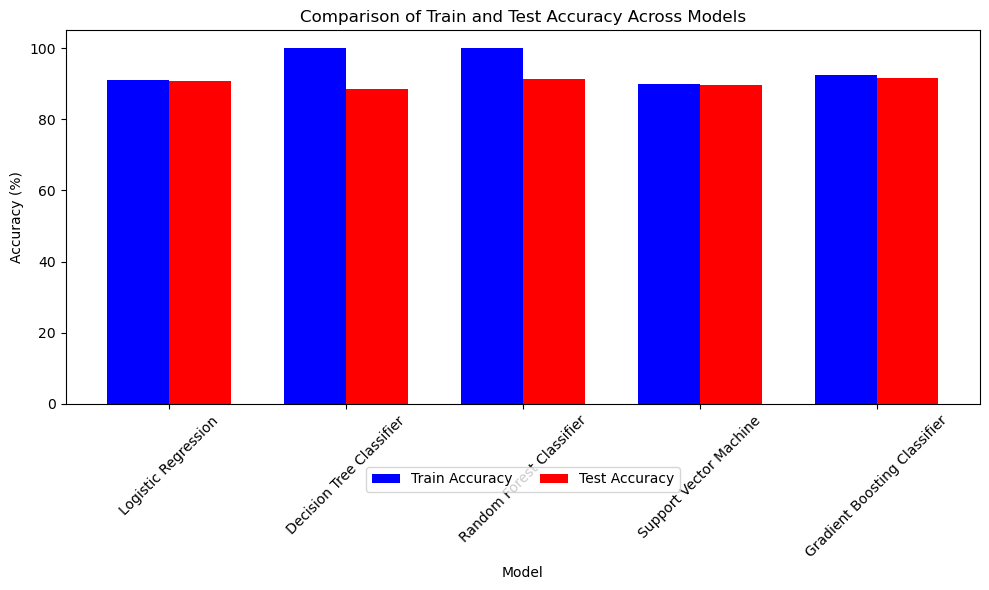

In [401]:
import matplotlib.pyplot as plt
import pandas as pd

# Data for the models
data = {
    'Model': ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier', 
              'Support Vector Machine', 'Gradient Boosting Classifier'],
    'Train Accuracy': [91.038407, 100.000000, 100.000000, 89.834507, 92.363737],
    'Test Accuracy': [90.730997, 88.593864, 91.330041, 89.638145, 91.500040]
}

# Creating a DataFrame
df = pd.DataFrame(data)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(df['Model']))

# Plot bars for Train Accuracy
plt.bar(index, df['Train Accuracy'], bar_width, label='Train Accuracy', color='b')

# Plot bars for Test Accuracy
plt.bar([i + bar_width for i in index], df['Test Accuracy'], bar_width, label='Test Accuracy', color='r')

# Adding labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Train and Test Accuracy Across Models')
plt.xticks([i + bar_width / 2 for i in index], df['Model'], rotation=45)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

# Display the plot
plt.tight_layout()
plt.show()

#### Confusion Matrix for Random Forest

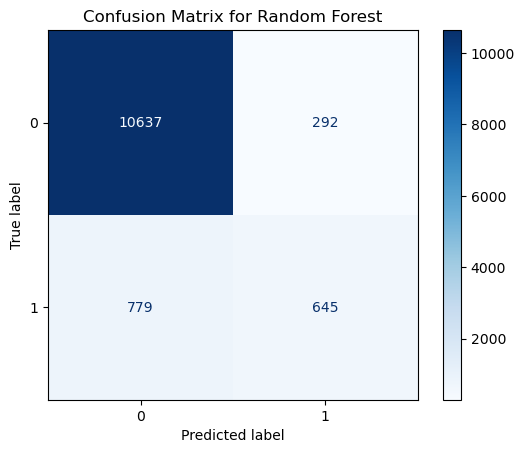

In [326]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Make predictions on the test set
y_pred = best_rf.predict(X_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Random Forest")
plt.show()

#### Confusion Matrix for Gradient Boosting

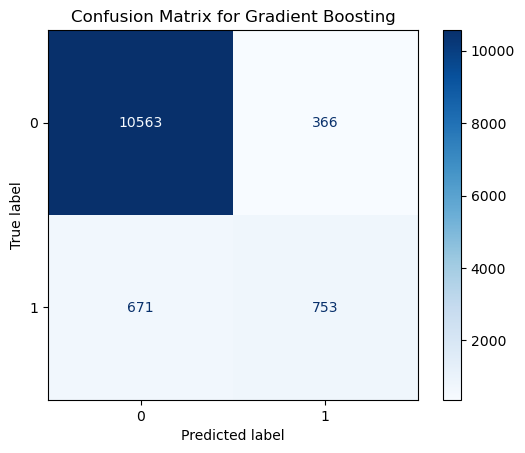

In [335]:

# Make predictions with the Gradient Boosting model
y_pred_gb = best_gb.predict(X_test)

# Generate the confusion matrix
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

# Display the confusion matrix
disp_gb = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_gb)
disp_gb.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Gradient Boosting")
plt.show()

### Feature importances for GB

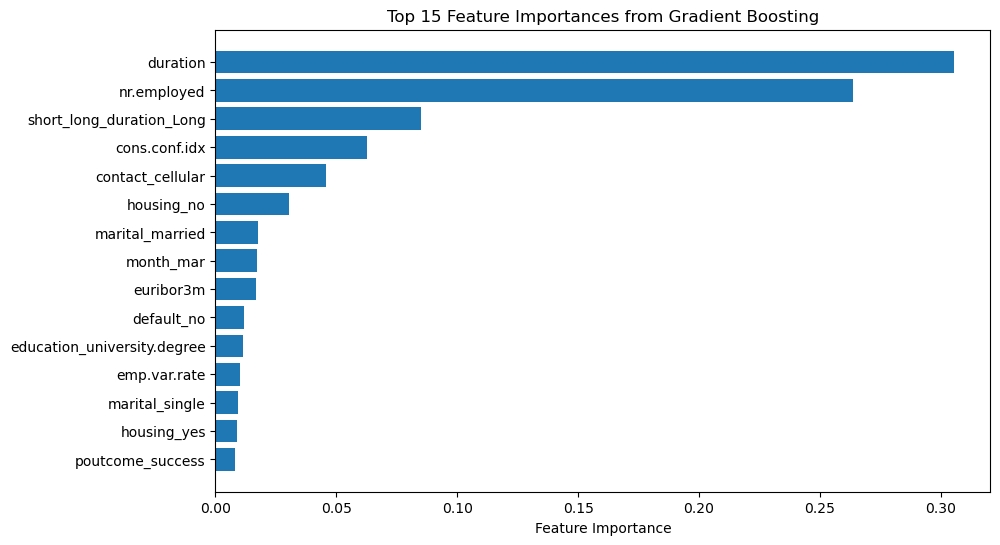

In [405]:
# Get feature importances
importances = best_gb.feature_importances_
features = X_train.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Select the top 15 features
top_features = importance_df.head(15)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Feature Importance')
plt.title('Top 15 Feature Importances from Gradient Boosting')
plt.gca().invert_yaxis()
plt.show()

##### Here’s a summary tailored to the context of predicting whether clients subscribed to a term deposit:

10,637 people who did not subscribe to the term deposit were correctly identified by the model.
645 people who did subscribe to the term deposit were also correctly identified.
However, the model mistakenly identified 292 people as subscribers when they actually did not subscribe.
Additionally, 779 people who actually subscribed to the term deposit were incorrectly identified as non-subscribers.

<Figure size 640x480 with 0 Axes>

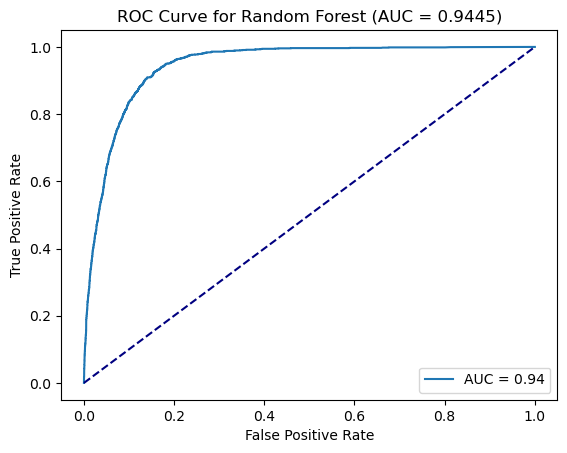

In [331]:
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay
# Predict the probabilities for the positive class (subscribed)
y_prob = best_rf.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute the AUC score
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure()
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title(f"ROC Curve for Random Forest (AUC = {roc_auc:.4f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

<Figure size 640x480 with 0 Axes>

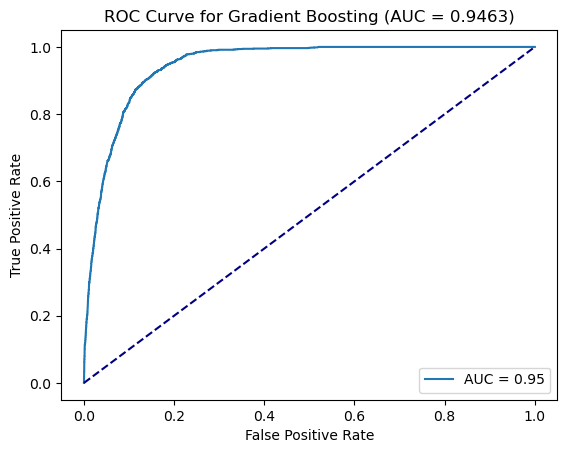

In [333]:
# Predict the probabilities for the positive class (subscribed)
y_prob_gb = best_gb.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_prob_gb)

# Compute the AUC score
roc_auc_gb = roc_auc_score(y_test, y_prob_gb)

# Plot the ROC curve
plt.figure()
RocCurveDisplay(fpr=fpr_gb, tpr=tpr_gb, roc_auc=roc_auc_gb).plot()
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title(f"ROC Curve for Gradient Boosting (AUC = {roc_auc_gb:.4f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

### Conclusion
The Gradient Boosting Classifier exhibits the best overall performance, with the highest cross-validation and test accuracy among the models, as well as the best balance of precision and recall for the minority class. It is recommended for deployment due to its superior performance metrics. All models show high precision for the majority class (Class 0), but struggle with lower recall for the minority class (Class 1), highlighting the need to address class imbalance. Techniques such as SMOTE or class weighting could help improve recall for Class 1. Models like Decision Trees and Random Forests show signs of overfitting with high training accuracy but lower test accuracy, so fine-tuning and monitoring are crucial. Overall, while Gradient Boosting stands out, exploring further model tuning and addressing class imbalance will enhance performance.

### Recommendations:

Deploy Gradient Boosting: Given its superior performance, Gradient Boosting should be the model of choice for deployment.

Improve Recall for Minority Class: Apply techniques like SMOTE or class weighting to enhance recall for Class 1, ensuring better detection of positive cases.

Fine-Tune Models: Continue hyperparameter tuning for the Gradient Boosting model to further optimize its performance.

Monitor for Overfitting: For Decision Trees and Random Forests, implement strategies to prevent overfitting, such as pruning or adjusting model complexity.

Iterate and Evaluate: Regularly assess model performance and consider experimenting with other models or advanced techniques to achieve the best possible outcomes.